In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#download cell report card from LIMS and then filter so only 2016 cells
#this will rewrite the dates from a string to datetime of just the month, day and year

df = pd.read_csv('custom_report(1).csv')
df['recording_date_time'] = df['recording_date']
for i,date in enumerate(df['recording_date']):
    date = date.split(' ')[0]
    df['recording_date'][i] = datetime.strptime(date,"%m/%d/%Y")
    

(array([ 735995.,  736024.,  736055.,  736085.,  736116.,  736146.,
         736177.,  736208.,  736238.,  736269.,  736299.]),
 <a list of 11 Text xticklabel objects>)

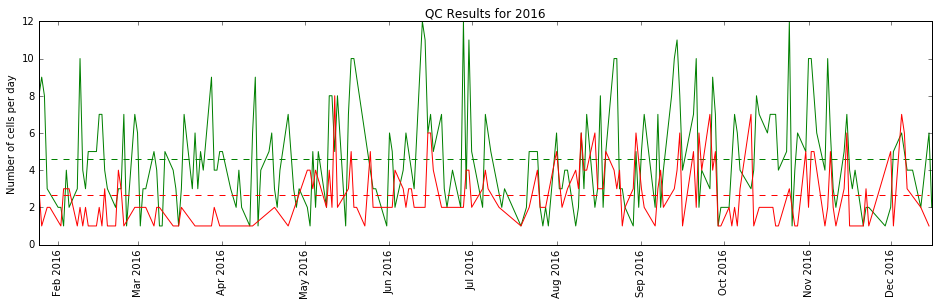

In [3]:
#make seperate dataframes for passing and failing cells
#add dotted lines for the mean

passing = df[df['ephys_qc'] == 'manual_passed']
passing = passing[passing['project'] != 'H301']
passing_df = passing.groupby(['recording_date']).size()
failing = df[df['ephys_qc'] == 'manual_failed']
failing = failing[failing['project'] != 'H301']
failing_df = failing.groupby(['recording_date']).size()

human_passing = df[df['ephys_qc'] == 'manual_passed']
human_passing = human_passing[human_passing['project'] == 'H301']
human_passing_df = human_passing.groupby(['recording_date']).size()
human_failing = df[df['ephys_qc'] == 'manual_failed']
human_failing = human_failing[human_failing['project'] == 'H301']
human_failing_df = human_failing.groupby(['recording_date']).size()

plt.figure(figsize = (16,4))
plt.plot_date(passing_df.index, passing_df, xdate = True, fmt = 'g-')
plt.plot_date(passing_df.index, np.ones(len(passing_df))*np.mean(passing_df), xdate = True, fmt = 'g--')
plt.plot_date(failing_df.index, failing_df, xdate = True, fmt = 'r-')
plt.plot_date(failing_df.index, np.ones(len(failing_df))*np.mean(failing_df), xdate = True, fmt = 'r--')
'''
plt.plot_date(human_passing_df.index, human_passing_df, xdate = True, fmt = 'b-')
plt.plot_date(human_passing_df.index, np.ones(len(human_passing_df))*np.mean(human_passing_df), xdate = True, fmt = 'b--')
plt.plot_date(human_failing_df.index, human_failing_df, xdate = True, fmt = 'k-')
plt.plot_date(human_failing_df.index, np.ones(len(human_failing_df))*np.mean(human_failing_df), xdate = True, fmt = 'k--')
'''
plt.ylabel('Number of cells per day')
plt.title('QC Results for 2016')
plt.xticks(rotation = 90)

In [3]:
np.unique(df['ephys_qc'])

array(['auto_failed', 'auto_passed', 'consult', 'invalid_data',
       'manual_failed', 'manual_passed', 'qc', 'stage1_passed',
       'stage2_passed'], dtype=object)

In [150]:
print df.groupby(['labtracks_id','ephys_qc']).size().index[0][0]
print df.groupby(['labtracks_id','ephys_qc']).size()[0]

222531
2


In [5]:
sorted(df.columns)

['apical',
 'bfi_filename',
 'cell_reporter',
 'cell_specimen_id',
 'cell_specimen_name',
 'dendrite_type',
 'drivers',
 'ephys_qc',
 'ephys_roi_result_id',
 'has_active_dendrite',
 'has_been_fit_bbp',
 'has_biophysical',
 'has_cell_soma_location',
 'has_glif1',
 'has_glif2',
 'has_glif3',
 'has_glif4',
 'has_glif5',
 'has_inst_thres_thumb',
 'has_morph_thumb',
 'has_nwb_download',
 'has_nwb_uncompressed',
 'has_sum_thumb',
 'image_series_20x_id',
 'image_series_20x_qc',
 'image_series_63x_id',
 'image_series_63x_qc',
 'ivscc_hold',
 'labtracks_id',
 'nwb_filename',
 'nwb_ready',
 'patched_cell_container',
 'project',
 'published_at',
 'recording_date',
 'reporters',
 'slice_biocytin_well',
 'slice_histology_well',
 'structure',
 'swc_filename',
 'tcp_sop']

In [14]:
df['recording_date'][501]

datetime.datetime(2016, 8, 4, 0, 0)

In [10]:
test = df[df['recording_date'] == df['recording_date'][500]]

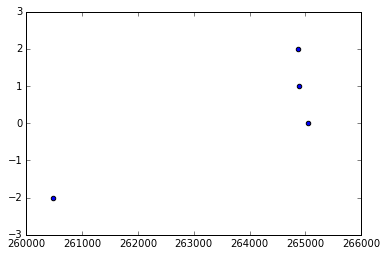

In [18]:
test = df[df['recording_date'] == df['recording_date'][500]]
specimen_ids = np.unique(test['labtracks_id'])

for i in specimen_ids:
    y1 = len(test[(test['labtracks_id'] == i) & (test['ephys_qc'] == 'manual_passed')])
    y2 = len(test[(test['labtracks_id'] == i) & (test['ephys_qc'] == 'manual_failed')])
    plt.scatter(i,y1-y2)


In [16]:
specimen_ids = np.unique(test['labtracks_id'])[0]


len(test[test['labtracks_id'] == 5])

0

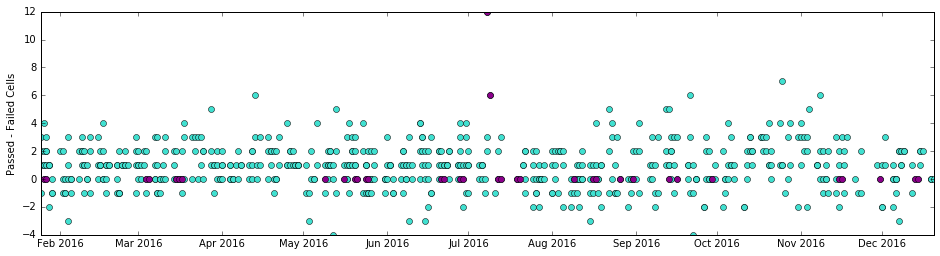

In [4]:
plt.figure(figsize = (16,4))
mouse_df = df[df['project'] != 'H301']
mouse_df = df[df['project'] != 'T301x']
human_df = df[df['project'] == 'H301']
#mouse_df = mouse_df[mouse_df['project'] != 'T301x']

#aver = np.empty([np.unique(mouse_df['recording_date']),3])

for i in np.unique(mouse_df['recording_date']):
    temp_df = mouse_df[mouse_df['recording_date'] == i]
    #aver = 0
    for mouse in np.unique(temp_df['labtracks_id']):
        y1 = len(temp_df[(temp_df['labtracks_id'] == mouse) & (temp_df['ephys_qc'] == 'manual_passed')])
        y2 = len(temp_df[(temp_df['labtracks_id'] == mouse) & (temp_df['ephys_qc'] == 'manual_failed')])
        plt.plot_date(i,y1-y2, xdate  = True, color = 'turquoise')
        
for i in np.unique(human_df['recording_date']):
    temp_df = human_df[human_df['recording_date'] == i]
    #aver = 0
    for mouse in np.unique(temp_df['labtracks_id']):
        y1 = len(temp_df[(temp_df['labtracks_id'] == mouse) & (temp_df['ephys_qc'] == 'manual_passed')])
        y2 = len(temp_df[(temp_df['labtracks_id'] == mouse) & (temp_df['ephys_qc'] == 'manual_failed')])
        plt.plot_date(i,y1-y2, xdate  = True, color = 'darkmagenta')
        #aver += (y1-y2)
    #plt.plot_date(i,aver/len(np.unique(temp_df['labtracks_id'])),xdate  = True, color = 'red') 
    
plt.ylabel('Passed - Failed Cells')
#plt.ylim(-1,14)


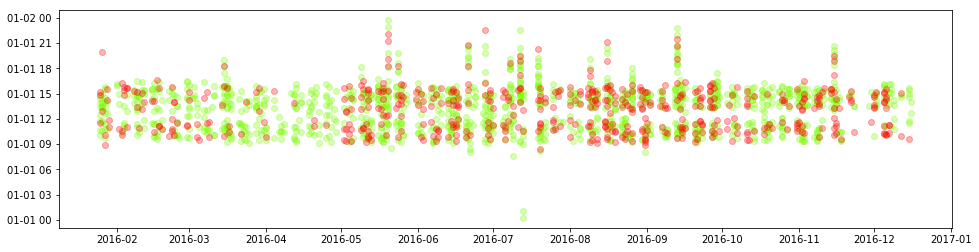

In [6]:
plt.figure(figsize = (16,4))
passing_df = df[df['ephys_qc'] == 'manual_passed']
failing_df = df[df['ephys_qc'] == 'manual_failed']


for i, date in enumerate(passing_df['recording_date']):
    time = passing_df['recording_date_time'].iloc[i].split(' ')[1]
    time = datetime.strptime(time,"%H:%M")
    plt.plot_date(date,time,ydate = True, xdate  = True, color = 'lawngreen', alpha = .3)

for i, date in enumerate(failing_df['recording_date']):
    time = failing_df['recording_date_time'].iloc[i].split(' ')[1]
    time = datetime.strptime(time,"%H:%M")
    plt.plot_date(date,time,ydate = True, xdate  = True, color = 'red', alpha = .3)

In [ ]:
passing_df['time'] = None
for i, time in enumerate(passing_df['recording_date_time']):
    passing_df['time'].iloc[i] =  datetime.strptime(time.split(' ')[1],"%H:%M")
    #time = datetime.strptime(time,"%H:%M")
    
passing_df['time'].hist(color = 'turquoise')

In [ ]:
ax = passing_df['time'].hist(color = 'turquoise', bins = 144)
ax.set_xlim(pd.Timestamp('1900-01-01 09:00:00'), pd.Timestamp('1900-01-01 18:00:00'))
#ax.set_xticks(rotation = 'vertical')

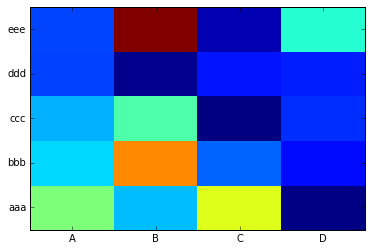

In [72]:
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
Cols = ['A', 'B', 'C', 'D']
df1 = DataFrame(abs(np.random.randn(5, 4)), index=Index, columns=Cols)

plt.pcolor(df1)
plt.yticks(np.arange(0.5, len(df1.index), 1), df1.index)
plt.xticks(np.arange(0.5, len(df1.columns), 1), df1.columns)
plt.show()

In [70]:
new_dataframe = pd.DataFrame(zip(sorted(passing_df.time)))
df_dups = pd.concat([new_dataframe, new_dataframe.sample(n=5, random_state=42)], ignore_index=True)
#df_dups['b'] = 1
df_dups.head()

,0
0,1900-01-01 00:14:00
1,1900-01-01 01:00:00
2,1900-01-01 07:35:00
3,1900-01-01 08:05:00
4,1900-01-01 08:06:00


In [84]:
new_dataframe.groupby(new_dataframe.index.dt.hour).count().plot(kind="bar")


AttributeError: 'RangeIndex' object has no attribute 'dt'

In [74]:
new_dataframe.columns

RangeIndex(start=0, stop=1, step=1)

In [141]:
print i
print time
print datetime.strptime(time,"%m/%d/%Y %H:%M")

2016-01-25 00:00:00
1/25/2016 13:50
2016-01-25 13:50:00


In [88]:
new_dataframe.set_index('date', inplace = True)
new_dataframe.sort(inplace = True)
new_dataframe.plot()

KeyError: 'date'

In [101]:
for i, human in enumerate(df['cell_specimen_name']):
    if df['project'][i] == 'H301' or df['project'][i] == 'H301x':
        df['labtracks_id'][i] = human[:9]

In [62]:
temp_df = mouse_df[mouse_df['recording_date'] == mouse_df['recording_date'].iloc[500]]
mouse = temp_df['labtracks_id'].iloc[0]
color = temp_df[temp_df['']]

,project,cell_specimen_id,cell_specimen_name,slice_histology_well,slice_biocytin_well,patched_cell_container,ephys_roi_result_id,recording_date,tcp_sop,ephys_qc,...,has_glif1,has_glif2,has_glif3,has_glif4,has_glif5,has_biophysical,has_active_dendrite,bfi_filename,nwb_filename,swc_filename
181,T301,555042364,Chrna2-Cre_OE25;Ai14(BT)-279955.04.01.01,Ephys_161212_12_B02_M,NaN,NaN,555042344,2016-11-01 00:00:00,V1 Coronal 107,manual_failed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/projects/mousecelltypes/vol1/prod828/specimen...,NaN,NaN
182,T301,555060623,Chrna2-Cre_OE25;Ai14(BT)-279955.04.01.02,Ephys_161212_12_B02_M,NaN,NaN,555060586,2016-11-01 00:00:00,V1 Coronal 107,manual_passed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/projects/mousecelltypes/vol1/prod828/specimen...,NaN,NaN
183,T301,555088069,Chrna2-Cre_OE25;Ai14(BT)-279955.05.01.01,Ephys_161212_12_B03_M,NaN,NaN,555087952,2016-11-01 00:00:00,V1 Coronal 107,manual_passed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/projects/mousecelltypes/vol1/prod828/specimen...,NaN,NaN
202,T301,555023466,Chrna2-Cre_OE25;Ai14(BT)-281693.03.02.01,Ephys_161031_02_A06_M,BIOCYTIN_161108_02_A06,NaN,555022799,2016-11-01 00:00:00,V1 Coronal 107,manual_passed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/projects/mousecelltypes/vol1/prod828/specimen...,NaN,NaN
203,T301,555016770,Chrna2-Cre_OE25;Ai14(BT)-281693.04.02.01,Ephys_161212_12_A06_M,NaN,NaN,555016667,2016-11-01 00:00:00,V1 Coronal 107,manual_passed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/projects/mousecelltypes/vol1/prod828/specimen...,NaN,NaN
204,T301,555001065,Chrna2-Cre_OE25;Ai14(BT)-281693.05.01.01,Ephys_161031_02_A05_M,BIOCYTIN_161108_02_A05,NaN,555001041,2016-11-01 00:00:00,V1 Coronal 107,manual_passed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/projects/mousecelltypes/vol1/prod828/specimen...,NaN,NaN
205,T301,555019563,Chrna2-Cre_OE25;Ai14(BT)-281693.06.01.01,Ephys_161212_12_B01_M,NaN,NaN,555019426,2016-11-01 00:00:00,V1 Coronal 107,manual_passed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/projects/mousecelltypes/vol1/prod828/specimen...,NaN,NaN
206,T301,555027367,Chrna2-Cre_OE25;Ai14(BT)-281693.06.01.02,Ephys_161212_12_B01_M,NaN,NaN,555027232,2016-11-01 00:00:00,V1 Coronal 107,manual_failed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/projects/mousecelltypes/vol1/prod828/specimen...,NaN,NaN
1958,T301,555042715,Ndnf-IRES2-dgCre;Ai14-278510.03.01.01,Ephys_161031_02_B01_M,BIOCYTIN_161108_02_B01,NaN,555042626,2016-11-01 00:00:00,V1 Coronal 107,manual_passed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/projects/mousecelltypes/vol1/prod828/specimen...,NaN,NaN
1959,T301,555061212,Ndnf-IRES2-dgCre;Ai14-278510.04.02.01,Ephys_161031_02_B02_M,BIOCYTIN_161108_02_B02,NaN,555060934,2016-11-01 00:00:00,V1 Coronal 107,manual_passed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/projects/mousecelltypes/vol1/prod828/specimen...,NaN,NaN


In [89]:
sorted(df.columns)

['apical',
 'bfi_filename',
 'cell_reporter',
 'cell_specimen_id',
 'cell_specimen_name',
 'dendrite_type',
 'drivers',
 'ephys_qc',
 'ephys_roi_result_id',
 'has_active_dendrite',
 'has_been_fit_bbp',
 'has_biophysical',
 'has_cell_soma_location',
 'has_glif1',
 'has_glif2',
 'has_glif3',
 'has_glif4',
 'has_glif5',
 'has_inst_thres_thumb',
 'has_morph_thumb',
 'has_nwb_download',
 'has_nwb_uncompressed',
 'has_sum_thumb',
 'image_series_20x_id',
 'image_series_20x_qc',
 'image_series_63x_id',
 'image_series_63x_qc',
 'ivscc_hold',
 'labtracks_id',
 'nwb_filename',
 'nwb_ready',
 'patched_cell_container',
 'project',
 'published_at',
 'recording_date',
 'reporters',
 'slice_biocytin_well',
 'slice_histology_well',
 'structure',
 'swc_filename',
 'tcp_sop']

In [41]:
cell_color_dict = {
    'Cart-IRES2-Cre': 'limegreen',
    'Chrna2-Cre_OE25':'chartreuse',
    'Ctgf-2A-dgCre':'indigo',
    'Cux2-Cre':'greenyellow',
    'Cux2-CreERT2':'greenyellow',
    'Esr2-IRES2-Cre-neo':'grey',
    'Ndnf-IRES2-dgCre':'teal',
    'Nkx2-1-CreERT2':'blueviolet',
    'Nos1-CreERT2':'olivedrab',
    'Nos1-CreERT2 Sst-IRES-FlpO':'mediumorchid',
    'Nr5a1-Cre':'darkcyan',
    'Ntsr1-Cre_GN220':'cyan',
    'Oxtr-T2A-Cre':'slategrey',
    'Penk-IRES2-Cre-neo':'royalblue',
    'Rbp4-Cre_KL100':'forestgreen',
    'Rorb-IRES2-Cre':'aquamarine',
    'Scnn1a-Tg2-Cre':'turquoise',
    'Sim1-Cre_KJ18':'lightsteelblue',
    'Slc17a6-IRES-Cre':'navajowhite',
    'Scnn1a-Tg3-Cre':'aqua',
    'Tlx3-Cre_PL56': 'seagreen',
    'Vipr2-IRES2-Cre': 'palegreen',
    'Chat-IRES-Cre-neo': 'coral',
    'Gad2-IRES-Cre':'darkred',
    'Htr3a-Cre_NO152':'saddlebrown',
    'Pvalb-IRES-Cre':'crimson',
    'Sst-IRES-Cre': 'orange',
    'Slc32a1-IRES-Cre': 'tomato',
    'Vip-IRES-Cre': 'fuchsia'}

In [54]:
mouse_df = df[df['project'] == 'T301' or df['project'] == 'T504']


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [50]:
mouse_df

,project,cell_specimen_id,cell_specimen_name,slice_histology_well,slice_biocytin_well,patched_cell_container,ephys_roi_result_id,recording_date,tcp_sop,ephys_qc,...,has_glif1,has_glif2,has_glif3,has_glif4,has_glif5,has_biophysical,has_active_dendrite,bfi_filename,nwb_filename,swc_filename
0,T301,506531782,234352.03.02.01,Ephys_Practice_05_C01,NaN,NaN,506531778,2016-03-09 00:00:00,V1 Coronal 124,auto_passed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/projects/mousecelltypes/vol1/prod630/specimen...,NaN,NaN
1,T301,506488040,234352.04.01.01,Ephys_160307_02_A03,BIOCYTIN_160315_02_A03,NaN,506488036,2016-03-09 00:00:00,V1 Coronal 124,auto_passed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/projects/mousecelltypes/vol1/prod630/specimen...,NaN,NaN
2,T301,506505713,234352.04.02.01,Ephys_160307_02_A04,BIOCYTIN_160315_02_A04,NaN,506505709,2016-03-09 00:00:00,V1 Coronal 124,manual_failed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/projects/mousecelltypes/vol1/prod630/specimen...,NaN,NaN
3,T301,506461896,234352.05.01.01,Ephys_Practice_05_B06,NaN,NaN,506461892,2016-03-09 00:00:00,V1 Coronal 124,auto_failed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/projects/mousecelltypes/vol1/prod630/specimen...,NaN,NaN
4,T301,505796973,234356.02.01.01,Ephys_Practice_05_A03,NaN,NaN,505796957,2016-03-07 00:00:00,V1 Coronal 107,auto_failed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/projects/mousecelltypes/vol1/prod622/specimen...,NaN,NaN
5,T301,505795869,234356.03.01.01,Ephys_Practice_05_A02,NaN,NaN,505795867,2016-03-07 00:00:00,V1 Coronal 107,auto_passed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/projects/mousecelltypes/vol1/prod622/specimen...,NaN,NaN
6,T301,505795846,234356.04.02.01,Ephys_160307_01_A04,BIOCYTIN_160315_01_A04,NaN,505795842,2016-03-07 00:00:00,V1 Coronal 107,manual_passed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/projects/mousecelltypes/vol1/prod622/specimen...,/projects/mousecelltypes/vol1/prod623/Ephys_Ro...,NaN
7,T301,505799581,234356.05.01.01,Ephys_160307_01_A06,BIOCYTIN_160315_01_A06,NaN,505799577,2016-03-07 00:00:00,V1 Coronal 107,auto_failed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/projects/mousecelltypes/vol1/prod622/specimen...,NaN,NaN
8,T301,505798354,234356.05.02.01,Ephys_160307_01_A05,BIOCYTIN_160315_01_A05,NaN,505798350,2016-03-07 00:00:00,V1 Coronal 107,manual_passed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/projects/mousecelltypes/vol1/prod622/specimen...,/projects/mousecelltypes/vol1/prod623/Ephys_Ro...,NaN
9,T301,505798597,234356.06.01.01,NaN,NaN,NaN,505798593,2016-03-07 00:00:00,V1 Coronal 107,auto_failed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/projects/mousecelltypes/vol1/prod622/specimen...,NaN,NaN
